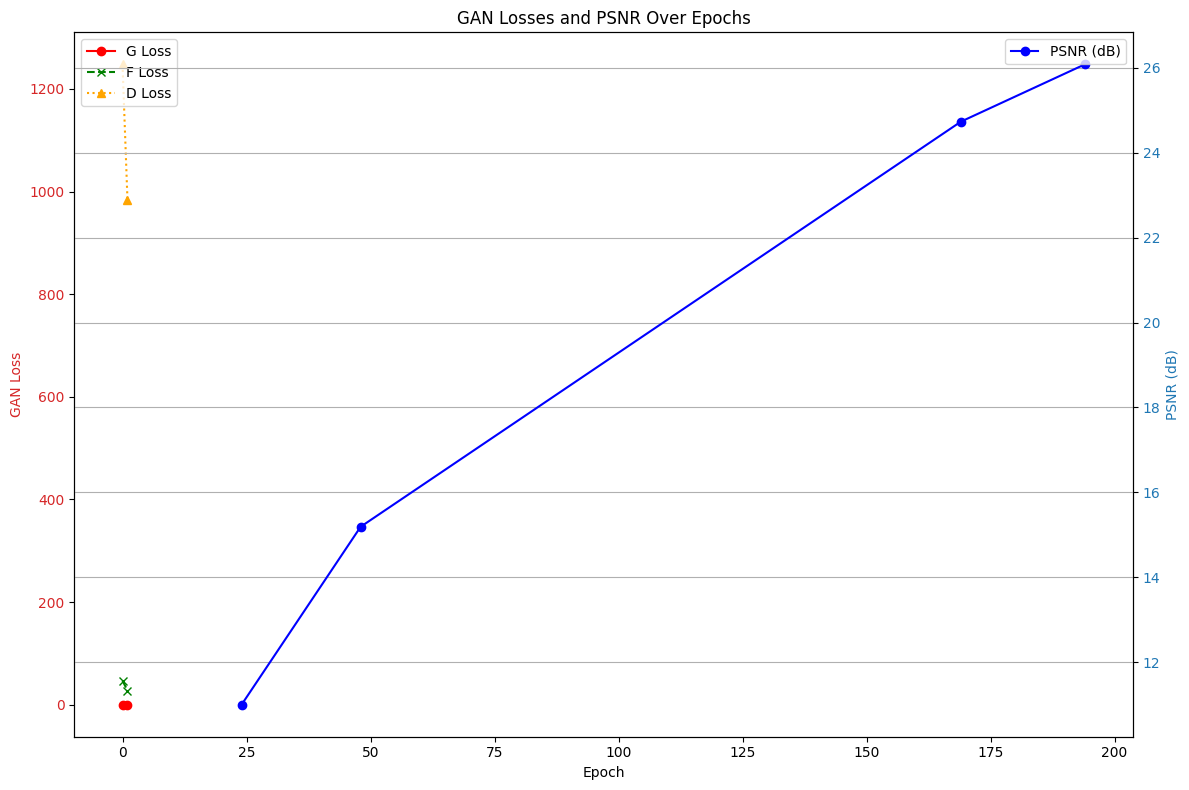

In [1]:
import re
import matplotlib.pyplot as plt

# Log entries to be parsed
logs = """
24-05-01 12:33:55.898 : <epoch:  0, iter:     200, lr:1.000e-03> G_loss: 8.677e-03 F_loss: 4.688e+01 D_loss: 1.248e+03 D_real: -5.158e+04 D_fake: -2.495e+05 
24-05-01 12:40:44.783 : <epoch:  1, iter:     400, lr:1.000e-03> G_loss: 3.437e-03 F_loss: 2.757e+01 D_loss: 9.833e+02 D_real: -5.255e+04 D_fake: -1.967e+05 
24-05-01 15:17:38.281 : <epoch: 24, iter:   5,000, lr:1.000e-03, Average PSNR : 11.00dB
24-05-01 18:08:12.884 : <epoch: 48, iter:  10,000, Average PSNR : 15.19dB
24-05-02 08:20:24.238 : <epoch:169, iter:  35,000, Average PSNR : 24.73dB
24-05-02 11:10:36.328 : <epoch:194, iter:  40,000, Average PSNR : 26.08dB
"""

# Regular expression to extract data from logs
psnr_pattern = r"<epoch:\s*(\d+),\s*iter:\s*(\d+)[^<]*Average PSNR\s*:\s*([\d\.]+)dB"

# Extract PSNR values
matches = re.findall(psnr_pattern, logs)
epochs_psnr = [int(m[0]) for m in matches]
psnr_values = [float(m[2]) for m in matches]

gan_pattern = r"<epoch:\s*(\d+),\s*iter:\s*(\d+)[^>]*> G_loss:\s*([\d\.e\+\-]+)\s*F_loss:\s*([\d\.e\+\-]+)\s*D_loss:\s*([\d\.e\+\-]+)"

# Extract GAN loss values
gan_matches = re.findall(gan_pattern, logs)
epochs_gan = [int(m[0]) for m in gan_matches]
g_losses = [float(m[2]) for m in gan_matches]
f_losses = [float(m[3]) for m in gan_matches]
d_losses = [float(m[4]) for m in gan_matches]

# Creating a combined plot for GAN losses and PSNR

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting GAN losses
ax1.set_xlabel('Epoch')
ax1.set_ylabel('GAN Loss', color='tab:red')
ax1.plot(epochs_gan, g_losses, marker='o', color='r', linestyle='-', label='G Loss')
ax1.plot(epochs_gan, f_losses, marker='x', color='g', linestyle='--', label='F Loss')
ax1.plot(epochs_gan, d_losses, marker='^', color='orange', linestyle=':', label='D Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper left')

# Plotting PSNR values on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('PSNR (dB)', color='tab:blue')
ax2.plot(epochs_psnr, psnr_values, marker='o', color='b', label='PSNR (dB)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

# Adding grid and title
plt.grid(True)
plt.title('GAN Losses and PSNR Over Epochs')
fig.tight_layout()
plt.show()


In [5]:
from cmath import e
import matplotlib.pyplot as plt


epochs = list(range(205))
G_losses = [8.677e-03, 3.437e-03, 1.397e-03, 1.770e-03, 1.073e-03, 1.226e-03, 8.501e-04, 6.261e-04, 5.950e-04, 8.485e-04,
            3.111e-04, 9.087e-04, 5.342e-04, 4.222e-04, 1.295e-03, 3.696e-03, 6.512e-04, 5.410e-04, 7.432e-04, 4.429e-04,
            4.920e-04, 2.699e-04, 4.965e-04, 6.154e-04, 7.178e-04, 6.994e-04, 3.791e-04, 3.342e-03, 6.551e-04, 6.295e-04,
            5.138e-04, 6.655e-04, 4.634e-04, 4.424e-04, 5.505e-04, 3.476e-04, 3.907e-04, 3.819e-04, 3.268e-04, 3.436e-04,
            6.106e-04, 2.514e-04, 2.688e-04, 2.310e-04, 1.439e-04, 2.283e-04, 2.442e-04, 2.895e-04, 2.558e-04, 2.962e-04,
            2.830e-04, 2.259e-04, 2.665e-04, 2.282e-04, 2.322e-04, 3.205e-04, 2.425e-04, 2.326e-04, 3.254e-04, 3.629e-04,
            2.264e-04, 3.053e-04, 3.395e-04, 2.767e-04, 3.298e-04, 2.641e-04, 4.987e-04, 2.652e-04, 3.752e-04, 4.138e-04,
            5.050e-04, 2.848e-04, 3.777e-04, 4.019e-04, 4.595e-04, 3.633e-04, 4.924e-04, 4.384e-04, 4.253e-04, 4.336e-04,
            5.150e-04, 5.132e-04, 6.296e-04, 4.207e-04, 6.640e-04, 5.324e-04, 1.034e-03, 2.920e-03, 9.987e-02, 2.140e-02,
            1.890e-02, 3.495e-04, 3.236e-03, 3.100e-03, 2.584e-03, 1.735e-03, 2.607e-03, 1.474e-03, 1.772e-03, 1.261e-03,
            6.495e-04, 4.581e-04, 3.135e-04, 1.680e-04, 1.094e-04, 7.127e-05, 4.507e-05, 7.016e-05, 6.208e-05, 6.030e-05,
            6.302e-05, 4.489e-05, 4.025e-05, 3.671e-05, 4.386e-05, 1.419e-04, 4.726e-05, 4.816e-05, 9.083e-04, 8.754e-05,
            1.672e-04, 1.250e-04, 5.975e-05, 4.474e-05, 3.715e-05, 6.661e-05, 4.860e-05, 5.344e-05, 5.086e-05, 4.359e-05,
            2.815e-05, 4.875e-05, 3.133e-05, 4.287e-05, 3.111e-05, 4.992e-05, 3.531e-05, 2.826e-05, 4.004e-05, 3.161e-05,
            5.759e-05, 4.053e-05, 3.623e-05, 4.601e-05, 5.101e-05, 6.706e-05, 9.810e-05, 5.380e-05, 3.376e-05, 5.812e-05,
            5.222e-05, 5.747e-05, 5.362e-04, 2.851e-05, 4.165e-05, 8.852e-05, 1.002e-04, 8.062e-05, 2.582e-05, 4.739e-05,
            5.800e-05, 8.860e-05, 4.715e-05, 7.018e-05, 2.686e-05, 3.445e-05, 9.614e-05, 1.083e-04, 8.445e-05, 1.246e-04,
            4.934e-05, 5.361e-05, 2.959e-04, 6.030e-05, 5.063e-05, 6.921e-05, 3.306e-05, 1.144e-04, 2.030e-05, 3.417e-04,
            3.520e-05, 2.909e-05]

F_losses = [4.688e+01, 2.757e+01, 1.204e+01, 7.502e+00, 7.239e+00, 8.704e+00, 5.985e+00, 6.411e+00, 6.803e+00, 7.313e+00,
            6.836e+00, 7.117e+00, 5.873e+00, 4.463e+00, 8.593e+00, 7.587e+00, 5.079e+00, 6.002e+00, 6.417e+00, 5.817e+00,
            6.912e+00, 6.959e+00, 5.851e+00, 6.498e+00, 5.880e+00, 5.159e+00, 5.776e+00, 8.909e+00, 7.936e+00, 7.096e+00,
            5.614e+00, 6.198e+00, 5.141e+00, 5.263e+00, 6.601e+00, 8.427e+00, 6.810e+00, 6.321e+00, 7.354e+00, 6.682e+00,
            8.083e+00, 6.467e+00, 5.990e+00, 7.307e+00, 4.951e+00, 6.086e+00, 5.804e+00, 7.339e+00, 6.418e+00, 5.738e+00,
            5.763e+00, 6.933e+00, 4.763e+00, 4.526e+00, 7.731e+00, 4.991e+00, 4.906e+00, 3.581e+00, 4.807e+00, 3.773e+00, 4.044e+00,
             6.227e+00, 3.659e+00, 5.449e+00, 5.264e+00, 5.652e+00, 6.346e+00, 6.464e+00, 4.539e+00, 3.918e+00, 5.217e+00,
             5.407e+00, 7.995e+00, 5.998e+00, 9.383e+01, 7.914e+00, 8.014e+00, 7.608e+00, 7.251e+00, 6.045e+00, 5.488e+00,
             4.656e+00, 6.406e+00, 4.777e+00, 4.351e+00, 5.463e+00, 2.460e+00, 3.792e+00, 3.617e+00, 3.348e+00, 3.503e+00,
             3.806e+00, 3.861e+00, 3.764e+00, 4.202e+00, 3.718e+00, 4.153e+00, 3.816e+00, 2.910e+00, 2.975e+00, 3.362e+00,
             3.573e+00, 3.242e+00, 3.075e+00, 4.430e+00, 5.447e+00, 2.648e+00, 3.392e+00, 2.576e+00, 3.044e+00, 2.825e+00,
             2.617e+00, 4.385e+00, 2.066e+00, 3.815e+00, 3.383e+00, 2.762e+00, 3.952e+00, 2.997e+00, 3.908e+00, 2.281e+00,
             3.266e+00, 2.779e+00, 2.342e+00, 3.727e+00, 2.481e+00, 3.731e+00, 3.476e+00, 3.453e+00, 3.487e+00, 2.793e+00,
             2.585e+00, 2.990e+00, 2.461e+00, 3.412e+00, 3.208e+00, 3.688e+00, 2.339e+00, 2.366e+00, 2.051e+00, 3.394e+00,
             2.916e+00, 2.643e+00, 2.857e+00, 3.663e+00, 2.938e+00, 3.320e+00, 2.397e+00, 2.563e+00, 2.859e+00, 3.602e+00,
             3.073e+00, 2.988e+00, 2.511e+00, 2.315e+00, 2.678e+00, 2.992e+00, 2.572e+00, 2.354e+00, 2.464e+00, 2.781e+00,
             2.015e+00, 3.387e+00, 2.594e+00, 2.286e+00]

D_losses = [1.248e+03, 9.833e+02, 7.980e+02, 8.198e+02, 7.470e+02, 7.264e+02, 8.900e+02, 4.832e+02, 2.812e+02, 2.479e+02,
            1.661e+02, 3.510e+02, 6.841e+02, 3.734e+02, 5.705e+02, 1.427e+01, 1.177e+00, 7.353e-01, 6.791e-01, 6.077e-01,
            5.672e-01, 7.991e-01, 7.800e-01, 9.279e-01, 1.454e+00, 2.197e+00, 1.954e+01, 1.539e+03, 9.001e+02, 7.123e+02,
            5.549e+02, 5.358e+02, 3.732e+02, 4.592e+02, 4.497e+02, 4.227e+02, 4.464e+02, 4.025e+02, 4.483e+02, 4.718e+02,
            3.954e+02, 2.445e-01, -7.838e-03, -2.639e-02, -2.209e-02, -2.252e-02, -2.578e-02, -3.173e-02, -2.869e-02, -3.188e-02,
            -3.197e-02, -2.338e-02, -3.180e-02, -3.163e-02, -3.222e-02, -3.146e-02, -3.415e-02, -3.351e-02, -3.368e-02, -3.380e-02,
            -3.381e-02, -3.198e-02, -3.405e-02, -3.303e-02, -3.390e-02, -3.369e-02, -3.206e-02, -3.492e-02, -3.413e-02, -3.161e-02,
            -3.047e-02, -3.327e-02, -2.927e-02, -3.313e-02, -3.321e-02, -2.714e-02, -3.080e-02, -2.780e-02, -2.926e-02, -2.764e-02,
            -2.633e-02, -2.332e-02, -8.527e-03, -2.203e-02, -2.385e-02, -1.392e-02, -1.077e-02, 8.793e+02, 7.406e-02, 9.737e+00,
            -4.182e-01, 3.624e+02, -8.885e-01, -7.904e-01, -7.450e-01, -7.027e-01, -6.362e-01, -6.196e-01, -6.107e-01, -6.252e-01,
            -6.397e-01, -6.670e-01, -7.050e-01, -7.397e-01, -8.510e-01, -7.816e-01, -6.789e-01, -6.363e-01, -4.000e-01, -3.731e-01,
            -3.351e-01, -3.331e-01, -3.603e-01, -4.184e-01, -3.462e-01, -3.392e-01, -3.458e-01, -2.689e-01, -9.197e-01, -7.600e-01,
            -3.856e-01, -2.818e-01, -2.767e-01, -2.906e-01, -2.558e-01, -2.309e-01, -2.233e-01, -2.060e-01, -2.046e-01, -1.809e-01,
            -2.066e-01, -3.138e-01, -2.151e-01, -2.425e-01, -2.364e-01, -2.945e-01, -2.813e-01, 4.053e-05, 3.623e-05, 4.601e-05, 5.101e-05,
             6.706e-05, 9.810e-05, 5.380e-05, 3.376e-05, 5.812e-05,
            5.222e-05, 5.747e-05, 5.362e-04, 2.851e-05, 4.165e-05, 8.852e-05, 1.002e-04, 8.062e-05, 2.582e-05, 4.739e-05,
            5.800e-05, 8.860e-05, 4.715e-05, 7.018e-05, 2.686e-05, 3.445e-05, 9.614e+02]


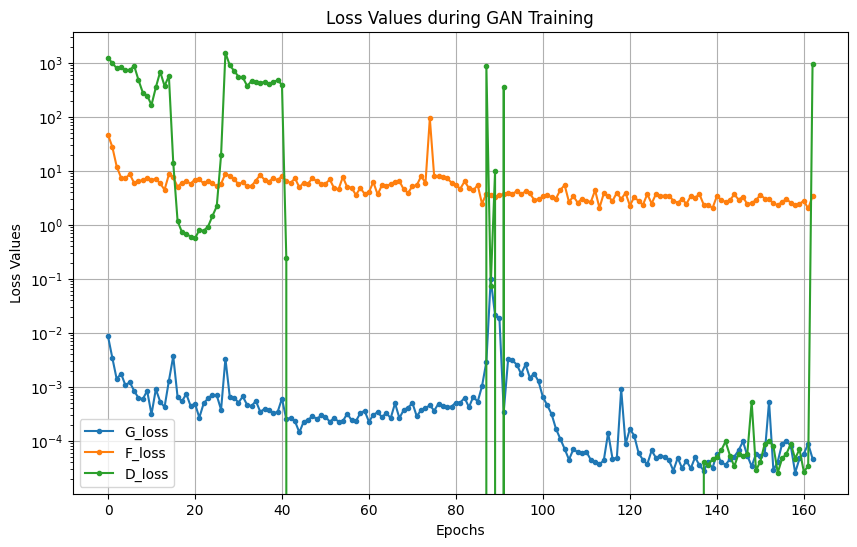

In [6]:
max_epochs = min(len(G_losses), len(F_losses), len(D_losses))
G_losses = G_losses[:max_epochs]
F_losses = F_losses[:max_epochs]
D_losses = D_losses[:max_epochs]
epochs = list(range(max_epochs))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(epochs, G_losses, label='G_loss', marker='o', markersize=3)
plt.plot(epochs, F_losses, label='F_loss', marker='o', markersize=3)
plt.plot(epochs, D_losses, label='D_loss', marker='o', markersize=3)
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.yscale('log')
plt.legend()
plt.title('Loss Values during GAN Training')
plt.grid(True)
plt.show()

In [2]:
import torch
import torch.nn.functional as F

def reconstruct(patches, shape, khw, stride):
    B, C, H, W = shape

    patches = patches.view(B, -1, C * khw * khw).transpose(1, 2)

    y_hat = F.fold(
        patches, output_size=(H, W), kernel_size=(khw, khw), stride=stride
    )

    one_patch = torch.ones((1, khw * khw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(
        one_patch, output_size=(H, W), kernel_size=(khw, khw), stride=stride
    )

    y_hat /= overlap_count.clamp(min=1)

    return y_hat

# Test parameters
B, C, H, W = (1, 1, 64, 64)  # Reduced dimensions to fit into memory
khw = 16
stride = 2

# Initialize a dummy patches tensor with random values
num_patches = ((H - khw) // stride + 1) * ((W - khw) // stride + 1)
patches = torch.randn(num_patches, 1, 16, 16)

# Reshape patches to match the expected input format
patches = patches.view(1, num_patches, 1, 16, 16)

# Call the reconstruct function with the test parameters
output = reconstruct(patches, (B, C, H, W), khw, stride)
output.shape

torch.Size([1, 1, 64, 64])

In [18]:
import torch
import torch.nn.functional as F

# Define the reconstruct function
def reconstruct(patches, shape, khw, stride):
    B, C, H, W = shape

    patches = patches.view(B, -1, C * khw * khw).transpose(1, 2)

    y_hat = F.fold(
        patches, output_size=(H, W), kernel_size=(khw, khw), stride=stride
    )

    one_patch = torch.ones((1, khw * khw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(
        one_patch, output_size=(H, W), kernel_size=(khw, khw), stride=stride
    )

    y_hat /= overlap_count.clamp(min=1)

    return y_hat

# Smaller parameters for demonstration
B = 1
C = 1
H = 74
W = 70
khw = 8
stride = 2

# Calculate the number of patches based on dimensions
num_patches_h = (H * 2 - khw) // stride + 1
num_patches_w = (W * 2 - khw) // stride + 1
patches_shape = (B, num_patches_h * num_patches_w, C, khw, khw)

# Generate a dummy tensor representing the patches
patches = torch.randn(*patches_shape)

# Shape of the final reconstructed image
shape = (B, C, H * 2, W * 2)

# Reconstruct the image
reconstructed_image = reconstruct(patches, shape, khw, stride)

# Check the shape of the reconstructed image
reconstructed_image_shape = reconstructed_image.shape
print(reconstructed_image_shape)


torch.Size([1, 1, 148, 140])


In [20]:
import torch

@staticmethod
def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    i_indices = torch.arange(0, row * stride, stride, device=device) * scale_factor
    j_indices = torch.arange(0, col * stride, stride, device=device) * scale_factor
    start_i_indices, start_j_indices = torch.meshgrid(i_indices, j_indices, indexing='ij')

    end_i_indices = (start_i_indices + patch_size).flatten()
    end_j_indices = (start_j_indices + patch_size).flatten()
    
    out = torch.zeros(batch_size, in_channels, height * scale_factor, width * scale_factor, device=device)
    count = torch.zeros_like(out)

    patches_per_image = row * col

    for b in range(batch_size):
        for i in range(patches_per_image):
            patch_idx = b * patches_per_image + i

            start_i, end_i = start_i_indices.flatten()[i], end_i_indices[i]
            start_j, end_j = start_j_indices.flatten()[i], end_j_indices[i]
            
            end_i = min(end_i, height * scale_factor)
            end_j = min(end_j, width * scale_factor)

            
            valid_i = end_i - start_i
            valid_j = end_j - start_j
            
            patch = decoded_patches[patch_idx, :, :valid_i, :valid_j]
            out[b, :, start_i:end_i, start_j:end_j] += patch
            count[b, :, start_i:end_i, start_j:end_j] += 1

    out /= count.clamp(min=1) 
    return out

# Example usage
decoded_patches = torch.randn(79186, 1, 16, 16)  # Simulated input
row = 274
col = 289
in_channels = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

reconstructed = _reconstruct(decoded_patches, row, col, in_channels, 1, patch_size, scale_factor, height, width, batch_size)


In [22]:
reconstructed.shape

torch.Size([1, 1, 592, 562])

In [3]:
import torch

def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    # Compute scaled indices
    i_indices = torch.arange(0, row * stride, stride, device=device) * scale_factor
    j_indices = torch.arange(0, col * stride, stride, device=device) * scale_factor
    start_i_indices, start_j_indices = torch.meshgrid(i_indices, j_indices, indexing='ij')

    # Compute end indices, ensuring they do not exceed the image dimensions
    end_i_indices = torch.clamp(start_i_indices + patch_size, max=height * scale_factor)
    end_j_indices = torch.clamp(start_j_indices + patch_size, max=width * scale_factor)

    # Prepare output tensors
    out = torch.zeros(batch_size, in_channels, height * scale_factor, width * scale_factor, device=device)
    count = torch.zeros_like(out)

    # Process each patch
    patches_per_image = row * col
    for b in range(batch_size):
        for i in range(patches_per_image):
            patch_idx = b * patches_per_image + i
            start_i, end_i = start_i_indices.flatten()[i], end_i_indices.flatten()[i]
            start_j, end_j = start_j_indices.flatten()[i], end_j_indices.flatten()[i]

            # Ensure the patch dimensions fit into the output tensor
            patch = decoded_patches[patch_idx, :, :(end_i-start_i), :(end_j-start_j)]
            out[b, :, start_i:end_i, start_j:end_j] += patch
            count[b, :, start_i:end_i, start_j:end_j] += 1

    # Avoid division by zero
    out /= count.clamp(min=1) 
    return out

# Parameters setup
decoded_patches = torch.randn(79186, 1, 16, 16)
row = 274
col = 289
in_channels = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

# Reconstruct the image
reconstructed_image = _reconstruct(decoded_patches, row, col, in_channels, 1, patch_size, scale_factor, height, width, batch_size)


In [4]:
reconstructed_image.shape

torch.Size([1, 1, 592, 562])

In [26]:
def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    # Calculate scaled indices
    i_indices = torch.arange(0, row * stride, stride, device=device) * scale_factor
    j_indices = torch.arange(0, col * stride, stride, device=device) * scale_factor
    start_i_indices, start_j_indices = torch.meshgrid(i_indices, j_indices, indexing='ij')

    # Calculate end indices and ensure they do not exceed image dimensions
    end_i_indices = torch.clamp(start_i_indices + patch_size, max=height * scale_factor)
    end_j_indices = torch.clamp(start_j_indices + patch_size, max=width * scale_factor)

    # Initialize output tensors
    out = torch.zeros(batch_size, in_channels, height * scale_factor, width * scale_factor, device=device)
    count = torch.zeros_like(out)

    patches_per_image = row * col

    for b in range(batch_size):
        for i in range(patches_per_image):
            patch_idx = b * patches_per_image + i
            start_i, end_i = start_i_indices.flatten()[i], end_i_indices.flatten()[i]
            start_j, end_j = start_j_indices.flatten()[i], end_j_indices.flatten()[i]

            if end_i > start_i and end_j > start_j:  # Ensure non-zero area
                patch = decoded_patches[patch_idx, :, :end_i-start_i, :end_j-start_j]
                out[b, :, start_i:end_i, start_j:end_j] += patch
                count[b, :, start_i:end_i, start_j:end_j] += 1

    # Normalize to handle overlapping patches
    out /= count.clamp(min=1)
    return out

# Example use case
decoded_patches = torch.randn(79186, 1, 16, 16)  # Example input tensor
row = 274
col = 289
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

reconstructed = _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)


In [27]:
reconstructed.shape


torch.Size([1, 1, 592, 562])

In [6]:
def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    i_indices = torch.arange(0, row * stride, stride, device=device) * scale_factor
    j_indices = torch.arange(0, col * stride, stride, device=device) * scale_factor
    start_i_indices, start_j_indices = torch.meshgrid(i_indices, j_indices, indexing='ij')

    end_i_indices = torch.clamp(start_i_indices + patch_size, max=height * scale_factor)
    end_j_indices = torch.clamp(start_j_indices + patch_size, max=width * scale_factor)

    out = torch.zeros(batch_size, in_channels, height * scale_factor, width * scale_factor, device=device)
    count = torch.zeros_like(out)

    patches_per_image = row * col
    for b in range(batch_size):
        for i in range(patches_per_image):
            patch_idx = b * patches_per_image + i
            start_i = start_i_indices.flatten()[i].item()
            start_j = start_j_indices.flatten()[i].item()
            end_i = end_i_indices.flatten()[i].item()
            end_j = end_j_indices.flatten()[i].item()

            patch = decoded_patches[patch_idx, :, 0:patch_size, 0:patch_size]
            out[b, :, start_i:end_i, start_j:end_j] += patch
            count[b, :, start_i:end_i, start_j:end_j] += 1

    out /= count.clamp(min=1)
    return out

decoded_patches = torch.randn(79186, 1, 16, 16)
row = 274
col = 289
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

reconstructed_image = _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)


In [7]:
reconstructed_image.shape

torch.Size([1, 1, 592, 562])

In [9]:
import torch

def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    # Scale height and width
    scaled_height = height * scale_factor
    scaled_width = width * scale_factor

    # Output tensor
    out = torch.zeros(batch_size, in_channels, scaled_height, scaled_width, device=device)
    count = torch.zeros_like(out)

    # Calculate indices for placing patches
    for b in range(batch_size):
        for i in range(row):
            for j in range(col):
                patch_idx = b * row * col + i * col + j
                start_i = i * stride * scale_factor
                start_j = j * stride * scale_factor
                end_i = min(start_i + patch_size, scaled_height)
                end_j = min(start_j + patch_size, scaled_width)

                # Adjust patch if it's on the edge
                patch_height = end_i - start_i
                patch_width = end_j - start_j
                patch = decoded_patches[patch_idx, :, :patch_height, :patch_width]

                # Place patch in output tensor
                out[b, :, start_i:end_i, start_j:end_j] += patch
                count[b, :, start_i:end_i, start_j:end_j] += 1

    # Normalize by count to manage overlaps
    out /= count.clamp(min=1)
    return out

# Example use case
decoded_patches = torch.randn(79186, 1, 16, 16)  # Example input tensor
row = 274
col = 289
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

reconstructed_image = _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)
print(reconstructed_image.shape)


torch.Size([1, 1, 592, 562])


In [10]:
import torch

def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    scaled_height = height * scale_factor
    scaled_width = width * scale_factor

    out = torch.zeros(batch_size, in_channels, scaled_height, scaled_width, device=device)
    count = torch.zeros_like(out)

    for b in range(batch_size):
        for i in range(row):
            for j in range(col):
                patch_idx = b * row * col + i * col + j
                start_i = i * stride * scale_factor
                start_j = j * stride * scale_factor
                end_i = min(start_i + patch_size, scaled_height)
                end_j = min(start_j + patch_size, scaled_width)

                # Ensure non-zero dimensions for patch application
                if end_i > start_i and end_j > start_j:
                    patch_height = end_i - start_i
                    patch_width = end_j - start_j
                    patch = decoded_patches[patch_idx, :, :patch_height, :patch_width]

                    out[b, :, start_i:end_i, start_j:end_j] += patch
                    count[b, :, start_i:end_i, start_j:end_j] += 1

    out /= count.clamp(min=1)
    return out


# Create a test with a patch exactly at the boundary
decoded_patches = torch.rand(1, 1, 16, 16)  # Random patch
row = 1
col = 1
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 16  # Patch size equals height
width = 16  # Patch size equals width
batch_size = 1

reconstructed_image = _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)
print(reconstructed_image.shape)
print(reconstructed_image)


torch.Size([1, 1, 16, 16])
tensor([[[[6.2069e-01, 5.1387e-01, 9.3136e-01, 4.1597e-01, 7.1342e-01,
           4.6167e-01, 2.0827e-01, 2.2765e-01, 8.7822e-01, 1.5625e-01,
           4.7502e-01, 9.2239e-01, 2.9296e-01, 3.8997e-01, 3.3389e-01,
           6.9606e-02],
          [3.8668e-01, 2.1071e-01, 5.1539e-01, 4.2597e-01, 5.7171e-01,
           6.9053e-01, 1.8918e-01, 1.0296e-01, 5.9571e-01, 8.2069e-01,
           7.8277e-02, 9.4489e-01, 7.2233e-01, 1.4144e-02, 9.0021e-01,
           1.9384e-01],
          [8.5703e-01, 1.3351e-01, 6.7157e-01, 9.8511e-01, 8.0443e-02,
           8.4644e-01, 8.6850e-03, 4.0293e-01, 7.1988e-02, 8.2135e-01,
           8.9222e-01, 3.4197e-01, 2.7918e-01, 6.8096e-01, 6.2508e-01,
           4.1285e-01],
          [2.2957e-01, 9.7100e-01, 5.6059e-02, 6.7729e-01, 1.6397e-04,
           2.6649e-01, 3.2800e-02, 2.2940e-01, 3.1452e-01, 9.8554e-01,
           4.8725e-01, 8.5352e-01, 8.7303e-01, 8.9697e-01, 8.1828e-01,
           1.6572e-01],
          [2.4443e-01, 2.

In [12]:
import torch

# def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
#     scaled_height = height * scale_factor
#     scaled_width = width * scale_factor

#     out = torch.zeros(batch_size, in_channels, scaled_height, scaled_width, device=device)
#     count = torch.zeros_like(out)

#     for b in range(batch_size):
#         for i in range(row):
#             for j in range(col):
#                 patch_idx = b * row * col + i * col + j
#                 start_i = i * stride * scale_factor
#                 start_j = j * stride * scale_factor
#                 end_i = start_i + patch_size
#                 end_j = start_j + patch_size

#                 # Ensure the patches do not exceed image boundaries
#                 if end_i > scaled_height or end_j > scaled_width:
#                     continue  # Skip patches that would overflow the dimensions

#                 # Extract the patch using fixed dimensions
#                 patch = decoded_patches[patch_idx, :, :patch_size, :patch_size]

#                 # Place patch in output tensor
#                 out[b, :, start_i:end_i, start_j:end_j] += patch
#                 count[b, :, start_i:end_i, start_j:end_j] += 1

#     # Normalize by count to manage overlaps
#     out /= count.clamp(min=1)
#     return out

def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    
    scaled_height = height * scale_factor
    scaled_width = width * scale_factor
    out = torch.zeros(batch_size, in_channels, scaled_height, scaled_width, device=device)
    count = torch.zeros_like(out)

   
    for b in range(batch_size):
        for i in range(row):
            for j in range(col):
                patch_idx = b * row * col + i * col + j
                start_i = i * stride * scale_factor
                start_j = j * stride * scale_factor
                end_i = min(start_i + patch_size, scaled_height)
                end_j = min(start_j + patch_size, scaled_width)

               
                patch = decoded_patches[patch_idx, :, :patch_size, :patch_size]
                out[b, :, start_i:end_i, start_j:end_j] += patch
                count[b, :, start_i:end_i, start_j:end_j] += 1

    
    out /= count.clamp(min=1)
    return out

# Example use case
decoded_patches = torch.randn(79186, 1, 16, 16)  # Example input tensor
row = 274
col = 289
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

reconstructed_image = _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)
print(reconstructed_image.shape)


torch.Size([1, 1, 592, 562])


In [13]:
import torch

def _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size=1, device='cpu'):
    # Calculate scaled dimensions
    scaled_height = height * scale_factor
    scaled_width = width * scale_factor

    # Initialize output and count tensors
    out = torch.zeros(batch_size, in_channels, scaled_height, scaled_width, device=device)
    count = torch.zeros_like(out)

    # Place each patch into the output tensor
    for b in range(batch_size):
        for i in range(row):
            for j in range(col):
                patch_idx = b * row * col + i * col + j
                start_i = i * stride * scale_factor
                start_j = j * stride * scale_factor
                end_i = start_i + patch_size
                end_j = start_j + patch_size

                # Ensure indices do not go out of bounds
                end_i = min(end_i, scaled_height)
                end_j = min(end_j, scaled_width)

                # Ensure the patch dimensions to apply are correct
                apply_height = end_i - start_i
                apply_width = end_j - start_j

                if apply_height > 0 and apply_width > 0:
                    patch = decoded_patches[patch_idx, :, :apply_height, :apply_width]
                    out[b, :, start_i:end_i, start_j:end_j] += patch
                    count[b, :, start_i:end_i, start_j:end_j] += 1

    # Normalize the output by the number of patches that contribute to each pixel
    out /= count.clamp(min=1)
    return out

# Use the function with parameters that match how your patches are prepared
decoded_patches = torch.randn(79186, 1, 16, 16)  # Adjusted to your data
row = 274
col = 289
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

reconstructed_image = _reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)
print(reconstructed_image.shape)


torch.Size([1, 1, 592, 562])


In [17]:
import torch

def reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size):
    scaled_height = height * scale_factor
    scaled_width = width * scale_factor

    # Prepare output and count tensors on the same device as decoded_patches
    output = torch.zeros((batch_size, in_channels, scaled_height, scaled_width), device=decoded_patches.device)
    count = torch.zeros_like(output)

    patch_idx = 0
    for i in range(row):
        for j in range(col):
            start_i = i * stride
            start_j = j * stride
            end_i = start_i + patch_size * scale_factor
            end_j = start_j + patch_size * scale_factor

            # Since end_i and end_j are calculated to exactly fit within the image dimensions
            patch = decoded_patches[patch_idx].view(in_channels, patch_size, patch_size)
            output[:, :, start_i:end_i, start_j:end_j] += patch
            count[:, :, start_i:end_i, start_j:end_j] += 1
            patch_idx += 1

    # Normalize by the count, avoiding division by zero
    output /= count.clamp(min=1)
    return output

# Parameters provided
decoded_patches = torch.randn(79186, 1, 16, 16)  # Adjusted to your data
row = 274
col = 289
in_channels = 1
stride = 1
patch_size = 16
scale_factor = 1
height = 592
width = 562
batch_size = 1

# Execute reconstruction
reconstructed_image = reconstruct(decoded_patches, row, col, in_channels, stride, patch_size, scale_factor, height, width, batch_size)
print(reconstructed_image.shape)  # This should output the shape of the reconstructed image


torch.Size([1, 1, 592, 562])


In [18]:
import torch
import torch.nn.functional as F

# Assume img is your input image tensor of shape [1, Channels, Height, Width]
# Let's create a random image tensor for demonstration
channels, height, width = 3, 128, 128  # Example dimensions
img = torch.randn(1, channels, height, width)

block_size = 16
stride = 8  # 50% overlap

# Step 1: Divide into overlapping blocks
unfolded = F.unfold(img, kernel_size=block_size, stride=stride)

# Step 2: Manipulate blocks (if needed, you can process your blocks here)

# Step 3: Reconstruct the image
# Reconstructing the image
reconstructed = F.fold(unfolded, output_size=(height, width), kernel_size=block_size, stride=stride)

# Correction factor for overlapping patches
# Create a ones tensor of the same shape as img
one_tensor = torch.ones_like(img)
unfolded_ones = F.unfold(one_tensor, kernel_size=block_size, stride=stride)
corrected_ones = F.fold(unfolded_ones, output_size=(height, width), kernel_size=block_size, stride=stride)

# Normalize the reconstructed image by the correction tensor
reconstructed /= corrected_ones

# Check if the reconstruction is perfect
print("Reconstruction error (should be close to 0):", torch.norm(img - reconstructed).item())


Reconstruction error (should be close to 0): 0.0


Reconstruction error (should be close to 0): 0.0


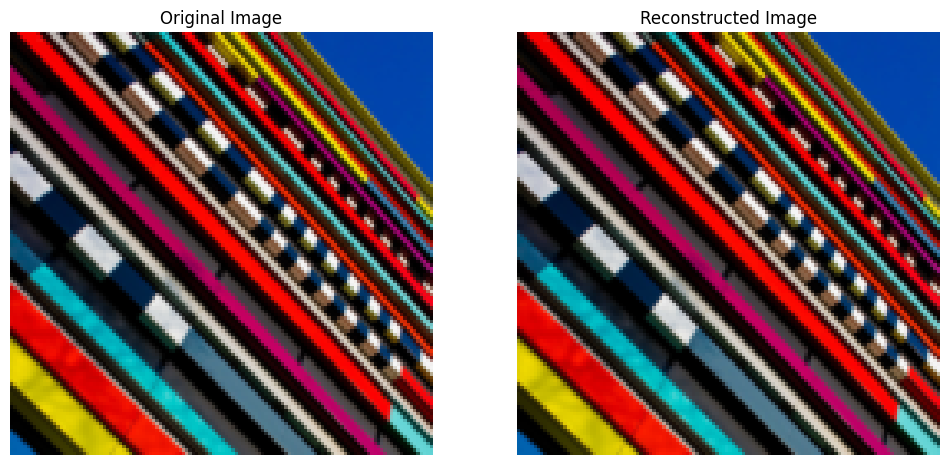

In [19]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load and transform image
image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
img = transform(image).unsqueeze(0)

# Image processing parameters
channels, height, width = 3, 128, 128
block_size = 16
stride = 8

# Divide into overlapping blocks
unfolded = F.unfold(img, kernel_size=block_size, stride=stride)

# Reconstruct the image
reconstructed = F.fold(unfolded, output_size=(height, width), kernel_size=block_size, stride=stride)

# Correction for overlapping patches
one_tensor = torch.ones_like(img)
unfolded_ones = F.unfold(one_tensor, kernel_size=block_size, stride=stride)
corrected_ones = F.fold(unfolded_ones, output_size=(height, width), kernel_size=block_size, stride=stride)
reconstructed /= corrected_ones

# Verify reconstruction
print("Reconstruction error (should be close to 0):", torch.norm(img - reconstructed).item())

# Plot the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(img.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()


In [20]:
unfolded.shape

torch.Size([1, 768, 225])

In [31]:
import torch
import torch.nn.functional as F

def reconstruct(patches, shape, khw, stride):
    B, C, H, W = shape
    patches = patches.view(B, -1, C * khw * khw).transpose(1, 2)
    y_hat = F.fold(patches, output_size=(H, W), kernel_size=(khw, khw), stride=stride)
    one_patch = torch.ones((1, khw * khw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(one_patch, output_size=(H, W), kernel_size=(khw, khw), stride=stride)
    y_hat /= overlap_count.clamp(min=1)
    return y_hat

batch_size, channels, height, width = 1, 3, 64, 64
n_y = torch.randn(batch_size, channels, height, width)

phw = 16
stride = 8

n_y_p = n_y.unfold(2, phw, stride).unfold(3, phw, stride)
n_y_p = n_y_p.contiguous().view(batch_size, channels, phw * phw, -1)
n_y_p = n_y_p.permute(0, 1, 3, 2).contiguous().view(batch_size, channels, -1, phw, phw)
n_y_p = F.max_pool3d(n_y_p, kernel_size=1, stride=1)
n_y_p = n_y_p.view(batch_size, channels, -1, phw, phw).permute(0, 2, 1, 3, 4).contiguous().view(batch_size, -1, phw * phw)

reconstructed = reconstruct(n_y_p, (batch_size, channels, height, width), phw, stride)

print("Reconstruction Error:", torch.norm(reconstructed - n_y).item())


Reconstruction Error: 128.82513427734375


In [33]:
import torch
import torch.nn.functional as F

def reconstruct(patches, shape, khw, stride):
    B, C, H, W = shape
    patches = patches.reshape(B, -1, C * khw * khw).transpose(1, 2)
    y_hat = F.fold(patches, output_size=(H, W), kernel_size=(khw, khw), stride=stride)
    one_patch = torch.ones((1, khw * khw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(one_patch, output_size=(H, W), kernel_size=(khw, khw), stride=stride)
    y_hat /= overlap_count.clamp(min=1)
    return y_hat

batch_size, channels, height, width = 1, 3, 64, 64
n_y = torch.randn(batch_size, channels, height, width)

phw = 16
stride = 8

n_y_p = n_y.unfold(2, phw, stride).unfold(3, phw, stride)
n_y_p = n_y_p.permute(0, 1, 4, 5, 2, 3).contiguous().reshape(batch_size, channels, -1, phw, phw)
n_y_p = F.max_pool3d(n_y_p, kernel_size=1, stride=1)
n_y_p = n_y_p.reshape(batch_size, channels, -1, phw, phw).permute(0, 2, 1, 3, 4).contiguous().reshape(batch_size, -1, phw * phw).transpose(1, 2)

reconstructed = reconstruct(n_y_p, (batch_size, channels, height, width), phw, stride)

print("Reconstruction Error:", torch.norm(reconstructed - n_y).item())


Reconstruction Error: 130.1322021484375


In [35]:
import torch
import torch.nn.functional as F

def reconstruct(patches, shape, phw, stride):
    B, C, H, W = shape
    patches = patches.view(B, -1, C * phw * phw).transpose(1, 2)
    y_hat = F.fold(patches, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    ones_patch = torch.ones((1, phw * phw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(ones_patch, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    y_hat /= overlap_count.clamp(min=1)
    return y_hat

batch_size, channels, height, width = 1, 3, 64, 64
n_y = torch.randn(batch_size, channels, height, width)

phw = 16
stride = 8

n_y_p = n_y.unfold(2, phw, stride).unfold(3, phw, stride)
n_y_p = n_y_p.contiguous().view(batch_size, channels, phw, phw, -1)
n_y_p = n_y_p.permute(0, 4, 1, 2, 3)
n_y_p = n_y_p.contiguous().view(-1, 1, channels, phw, phw)

n_y_p = F.max_pool3d(n_y_p, kernel_size=1, stride=1)

n_y_p = n_y_p.view(batch_size, -1, channels, phw * phw).transpose(1, 2).contiguous()
reconstructed = reconstruct(n_y_p, (batch_size, channels, height, width), phw, stride)

print("Reconstruction Error:", torch.norm(reconstructed - n_y).item())


Reconstruction Error: 130.6214141845703


Reconstruction Error: 34.691463470458984
PSNR: 10.09035587310791


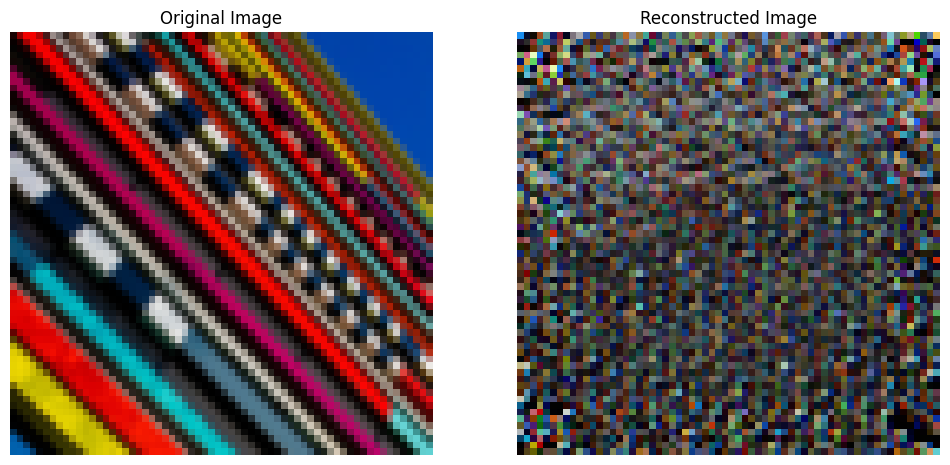

In [36]:
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import piq

def reconstruct(patches, shape, phw, stride):
    B, C, H, W = shape
    patches = patches.view(B, -1, C * phw * phw).transpose(1, 2)
    y_hat = F.fold(patches, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    ones_patch = torch.ones((1, phw * phw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(ones_patch, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    y_hat /= overlap_count.clamp(min=1)
    return y_hat

image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
img = transform(image).unsqueeze(0)

batch_size, channels, height, width = img.shape

phw = 16
stride = 8

n_y_p = img.unfold(2, phw, stride).unfold(3, phw, stride)
n_y_p = n_y_p.contiguous().view(batch_size, channels, phw, phw, -1)
n_y_p = n_y_p.permute(0, 4, 1, 2, 3)
n_y_p = n_y_p.contiguous().view(-1, 1, channels, phw, phw)

n_y_p = F.max_pool3d(n_y_p, kernel_size=1, stride=1)

n_y_p = n_y_p.view(batch_size, -1, channels, phw * phw).transpose(1, 2).contiguous()
reconstructed = reconstruct(n_y_p, (batch_size, channels, height, width), phw, stride)

reconstruction_error = torch.norm(reconstructed - img).item()
psnr_value = piq.psnr(reconstructed, img, data_range=1.0).item()

print("Reconstruction Error:", reconstruction_error)
print("PSNR:", psnr_value)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(img.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()


Reconstruction Error: 33.61387634277344
PSNR: 10.364437103271484


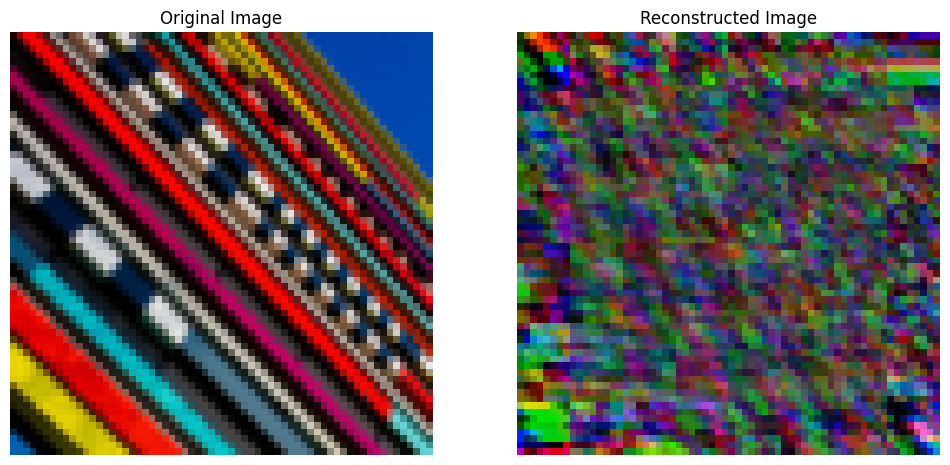

In [38]:
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import piq

def reconstruct(patches, shape, phw, stride):
    B, C, H, W = shape
    patches = patches.reshape(B, -1, C * phw * phw).transpose(1, 2)
    y_hat = F.fold(patches, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    ones_patch = torch.ones((1, phw * phw, patches.shape[-1]), device=patches.device)
    overlap_count = F.fold(ones_patch, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    y_hat /= overlap_count.clamp(min=1)
    return y_hat

image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
img = transform(image).unsqueeze(0)

batch_size, channels, height, width = img.shape

phw = 16
stride = 8

n_y_p = img.unfold(2, phw, stride).unfold(3, phw, stride)
n_y_p = n_y_p.contiguous().reshape(batch_size, channels, phw, phw, -1)
n_y_p = n_y_p.permute(0, 4, 1, 2, 3)
n_y_p = n_y_p.contiguous().reshape(-1, 1, channels, phw, phw)

n_y_p = F.max_pool3d(n_y_p, kernel_size=1, stride=1)

n_y_p = n_y_p.reshape(batch_size, -1, channels, phw * phw).permute(0, 2, 1, 3).contiguous().reshape(batch_size, -1, phw * phw).transpose(1, 2)

reconstructed = reconstruct(n_y_p, (batch_size, channels, height, width), phw, stride)

reconstruction_error = torch.norm(reconstructed - img).item()
psnr_value = piq.psnr(reconstructed, img, data_range=1.0).item()

print("Reconstruction Error:", reconstruction_error)
print("PSNR:", psnr_value)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(img.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()


In [39]:
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import piq

def reconstruct(patches, shape, phw, stride):
    B, C, H, W = shape
    patches = patches.view(B, -1, C * phw * phw).transpose(1, 2)
    y_hat = F.fold(patches, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    ones_patch = torch.ones_like(patches)
    overlap_count = F.fold(ones_patch, output_size=(H, W), kernel_size=(phw, phw), stride=stride)
    y_hat /= overlap_count.clamp(min=1)
    return y_hat

image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
img = transform(image).unsqueeze(0)

batch_size, channels, height, width = img.shape

phw = 16
stride = 8

n_y_p = img.unfold(2, phw, stride).unfold(3, phw, stride)
n_y_p = n_y_p.contiguous().view(batch_size, channels, phw * phw, -1)
n_y_p = n_y_p.permute(0, 1, 3, 2).contiguous().view(batch_size * channels, -1, phw, phw)

n_y_p = F.max_pool3d(n_y_p, kernel_size=1, stride=1)

n_y_p = n_y_p.view(batch_size, channels, -1, phw * phw).permute(0, 2, 1, 3).contiguous().view(batch_size, -1, phw * phw).transpose(1, 2)

reconstructed = reconstruct(n_y_p, (batch_size, channels, height, width), phw, stride)

reconstruction_error = torch.norm(reconstructed - img).item()
psnr_value = piq.psnr(reconstructed, img, data_range=1.0).item()

print("Reconstruction Error:", reconstruction_error)
print("PSNR:", psnr_value)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(img.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()


RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [49]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path)
    transform = transforms.ToTensor()
    return transform(image).to(device)  # Move tensor to GPU

# Extract overlapping blocks
def extract_blocks(img_tensor, block_size, overlap):
    blocks = []
    step = block_size - overlap
    for i in range(0, img_tensor.shape[1] - block_size + 1, step):
        for j in range(0, img_tensor.shape[2] - block_size + 1, step):
            block = img_tensor[:, i:i+block_size, j:j+block_size]
            blocks.append(block)
    return torch.stack(blocks).to(device)  # Stack and move blocks to GPU

# Reconstruct the image from blocks
def reconstruct_image(blocks, original_dims, block_size, overlap):
    height, width = original_dims
    step = block_size - overlap
    recon_image = torch.zeros(3, height, width).to(device)
    count_matrix = torch.zeros(3, height, width).to(device)

    idx = 0
    for i in range(0, height - block_size + 1, step):
        for j in range(0, width - block_size + 1, step):
            recon_image[:, i:i+block_size, j:j+block_size] += blocks[idx]
            count_matrix[:, i:i+block_size, j:j+block_size] += 1
            idx += 1

    recon_image /= count_matrix
    return recon_image


image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image_tensor = load_image(image_path)
blocks = extract_blocks(image_tensor, 16, 1)
reconstructed_image = reconstruct_image(blocks, image_tensor.shape[1:], 16, 1)

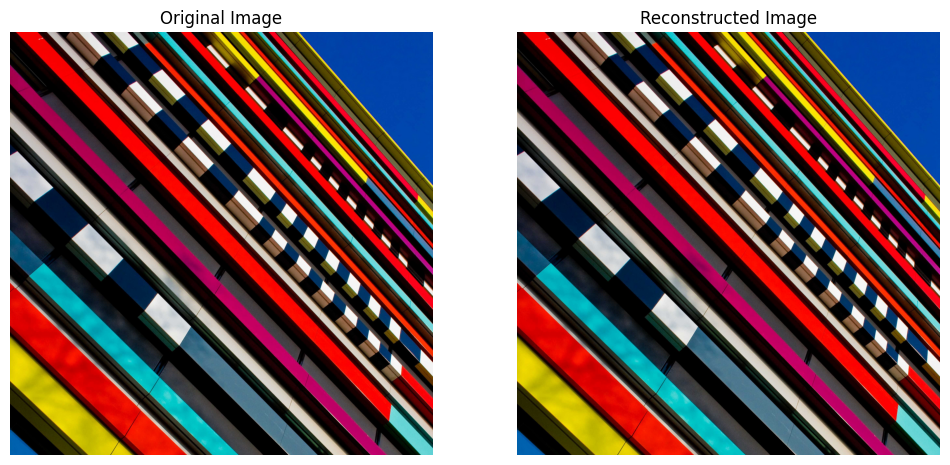

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(image_tensor.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed_image.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()

In [50]:
blocks.shape

torch.Size([4624, 3, 16, 16])